In [1]:
import sys
import os.path
import pylab as plt
plt.style.use('dark_background')
#path = '../'
#sys.path.append(path)
from zedstat.zedstat import zedstat
import pandas as pd

In [2]:
df=pd.read_csv('examples_data/roc2.csv')
df=df.sort_values('fpr')
#df=df.drop('threshold',axis=1)

In [3]:
zt=zedstat(df=df,order=3,total_samples=100000,positive_samples=1000,alpha=0.1,prevalence=.01)

In [5]:
zt.smooth(STEP=0.001)
zt.convexify()
zt.allmeasures(interpolate=True)
zt.correctPPV()
zt.usample(precision=3)
zt.getDelta()
zt.getBounds()

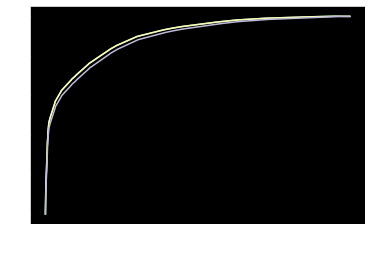

In [6]:
ax=zt.df_lim['U'].tpr.plot()
ax=zt.df_lim['L'].tpr.plot(ax=ax)
ax=zt.get().tpr.plot(ax=ax)


In [7]:
wf=zt.get()

<AxesSubplot:xlabel='LR-'>

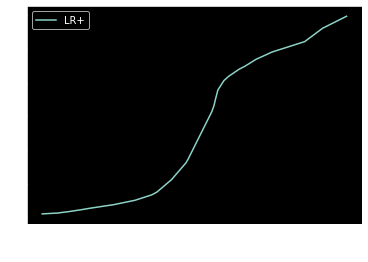

In [8]:
wf.plot(x='LR-',y='LR+')

In [20]:
zt.operating_zone(LRminus = 0.65)

,fpr,tpr,ppv,acc,npv,LR+,LR-,threshold
high precision,0.008,0.358115,0.307628,0.985499,0.993506,43.99784,0.647145,0.234186
high sensitivity,0.064,0.616202,0.091559,0.932393,0.995877,10.00695,0.409831,0.031257


In [21]:
zt.auc_cb2()

In [22]:
zt.auc()

{'U': 0.9011943034492365,
 'L': 0.9011943034492365,
 'nominal': 0.8875903790087464,
 'auc_L': 0.8721951632227701,
 'auc_U': 0.9050772210346357}

In [23]:
rf,txt=zt.interpret(fpr=0.008,number_of_positives=10)
txt

['For every 10 positive instances',
 'we raise 26 flags,',
 'out of which 5 are true positives',
 '21 are false alarms',
 '5 cases are missed']

In [24]:
zt.samplesize(delta_auc=.1)

26.99420757849582

<AxesSubplot:>

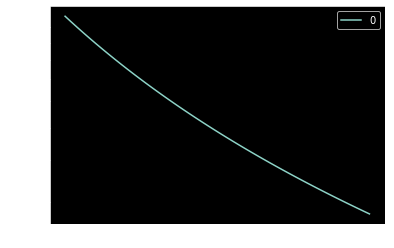

In [25]:
import numpy as np
pd.DataFrame(np.array([zt.samplesize(delta_auc=a) 
                       for a in np.arange(.05,.1,.001)]),
             np.arange(.05,.1,.001)).plot(logy=True)

In [27]:
zt.pvalue(delta_auc=0.02)

0.045256037450792166

Text(0, 0.5, 'pvalue')

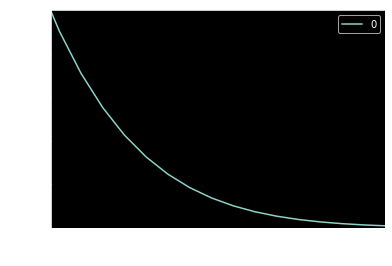

In [28]:
pd.DataFrame([zt.pvalue(delta_auc=a) for a in np.arange(0.001,.1,.001)],
             np.arange(0.001,.1,.001)).plot()
plt.gca().set_ylim(0,0.05)   
plt.gca().set_xlim(0.0196,0.035)   
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('pvalue')


In [33]:
wf=zt.get()
wf

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,1.000000,0.990000,0.990000,59.735339,1.000000,1.470513
0.001,0.080175,0.361694,0.989363,0.990781,56.153067,0.921153,0.380974
0.002,0.139650,0.345121,0.988686,0.991363,52.201465,0.862598,0.349475
0.003,0.175802,0.340570,0.988262,0.991717,51.172271,0.826949,0.332624
0.004,0.211953,0.336019,0.987838,0.992071,50.143077,0.791299,0.315774
...,...,...,...,...,...,...,...
0.996,1.000000,0.001330,0.013881,1.000753,1.004043,0.000000,0.001358
0.997,1.000000,0.000998,0.012911,1.000781,1.003032,0.000000,0.001356
0.998,1.000000,0.000665,0.011941,1.000809,1.002022,0.000000,0.001355


In [39]:
LRplus=10
LRminus=.65
wf=zt.get()
n=1
wf[(wf['LR+']>LRplus)& (wf['LR-']<LRminus) ]


,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.009,0.393100,0.297132,0.984598,0.993850,41.873094,0.612655,0.205761
0.010,0.408649,0.290943,0.984093,0.994002,40.643574,0.597361,0.189934
0.011,0.429300,0.276254,0.983026,0.994203,37.807243,0.577267,0.152733
0.012,0.437318,0.262171,0.982056,0.994278,35.185090,0.569770,0.126618
0.013,0.443149,0.250922,0.981191,0.994331,33.170036,0.564399,0.114574
0.014,0.450802,0.240110,0.979838,0.994401,31.383308,0.557379,0.104351
0.015,0.455539,0.234964,0.978942,0.994445,30.596294,0.553033,0.101359
0.016,0.460277,0.229818,0.978047,0.994488,29.809280,0.548688,0.098368
0.017,0.465015,0.224672,0.977151,0.994532,29.022266,0.544342,0.095376


In [56]:
pd.concat([wf[(wf['LR+']>LRplus)
                          & (wf['LR-']<LRminus) ]\
                       .sort_values('ppv',ascending=False).head(n),
                       wf[(wf['LR+']>LRplus)
                          & (wf['LR-']<LRminus) ]\
                       .sort_values('tpr',ascending=False).head(n)])

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.009,0.393100,0.297132,0.984598,0.993850,41.873094,0.612655,0.205761
0.064,0.616202,0.091559,0.932393,0.995877,10.006950,0.409831,0.031257


In [57]:
opf=zt.operating_zone(LRminus=.65)
rf0,txt0=zt.interpret(fpr=opf.fpr.values[0],number_of_positives=10)
rf1,txt1=zt.interpret(fpr=opf.fpr.values[1],number_of_positives=10)
display(opf)
print(txt0,'\n',txt1)

,fpr,tpr,ppv,acc,npv,LR+,LR-,threshold
high precision,0.009,0.393100,0.297132,0.984598,0.993850,41.873094,0.612655,0.205761
high sensitivity,0.064,0.616202,0.091559,0.932393,0.995877,10.006950,0.409831,0.031257


['For every 10 positive instances', 'we raise 26 flags,', 'out of which 5 are true positives', '22 are false alarms', '5 cases are missed'] 
 ['For every 10 positive instances', 'we raise 45 flags,', 'out of which 6 are true positives', '39 are false alarms', '4 cases are missed']


In [ ]:
fopr=zt.operating_zone(LRminus=.65)
fopr

In [ ]:
fopr=zt.operating_zone(LRminus=.65).fpr.values
wf_=wf.loc[fopr[0]:fopr[1]]
print(fopr)
rf0,txt0=zt.interpret(fpr=fopr[0],number_of_positives=10)
rf1,txt1=zt.interpret(fpr=fopr[1],number_of_positives=10)
print('high precision operation:\n',txt0)
print('high recall operation:\n',txt1)

In [ ]:
ax=wf_.plot(x='LR-',y='LR+')